# Catching Up

## Exploratory Data Analysis (EDA)

Our main goal while doing EDA is to [summarize main characteristics of our dataset](https://en.wikipedia.org/wiki/Exploratory_data_analysis).

It's crucial that we understand what our data is composed of.

### First, we take a look.

````{toggle} configuration.py
    :show:
```{literalinclude} configuration.py   
```
````

In [1]:
from read_data import read_data # read data from file at a destinaiton defined in configuration.py
from get_scattered_chunks import get_scattered_chunks # get scattered chunks of data
from print_table import print_table # Styling and printing the table
import pandas as pd
pd.set_option("future.no_silent_downcasting", True)

In [2]:
data = read_data()
data_chunks = get_scattered_chunks(data, n_chunks=5, chunk_size=3)
print_table(data_chunks)

,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,smoker,temperature,pulse,sys,dia,rr,sats,rapid_flu_results,rapid_strep_results,ctab,labored_respiration,rhonchi,wheezes,days_since_symptom_onset,cough,cough_severity,fever,sob,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,er_referral
0,SARS COV 2 RNA RTPCR,Nasopharyngeal,False,58,True,nan,False,False,False,False,False,False,False,False,36.950000,81.000000,126.000000,82.000000,18.000000,97.000000,nan,nan,False,False,False,False,28.000000,True,Severe,nan,False,nan,False,False,False,False,False,False,False,False,False
1,"SARS-CoV-2, NAA",Oropharyngeal,False,35,False,nan,False,False,False,False,False,False,False,False,36.750000,77.000000,131.000000,86.000000,16.000000,98.000000,nan,nan,False,False,False,False,nan,True,Mild,False,False,nan,False,False,False,False,False,False,False,False,False
2,SARS CoV w/CoV 2 RNA,Oropharyngeal,False,12,nan,nan,False,False,False,False,False,False,False,False,36.950000,74.000000,122.000000,73.000000,17.000000,98.000000,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False
23498,"SARS-CoV-2, NAA",Nasal,False,35,False,False,False,False,False,False,False,False,False,False,37.000000,69.000000,136.000000,84.000000,12.000000,100.000000,nan,nan,False,nan,nan,nan,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
23499,"SARS-CoV-2, NAA",Nasal,False,24,False,True,False,False,False,False,False,False,False,False,36.750000,70.000000,128.000000,78.000000,12.000000,99.000000,nan,nan,nan,False,False,False,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
23500,"SARS-CoV-2, NAA",Nasal,False,52,False,False,False,False,False,False,False,False,False,False,37.000000,94.000000,165.000000,82.000000,12.000000,98.000000,nan,nan,nan,False,False,False,7.000000,True,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
46996,"SARS-CoV-2, NAA",Nasal,False,11,False,False,False,False,False,False,False,False,False,False,36.900000,78.000000,116.000000,79.000000,16.000000,100.000000,nan,nan,True,False,True,True,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
46997,"SARS-CoV-2, NAA",Nasal,False,30,False,False,False,False,False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,False,False,nan,False,False,False,False,False,False,False,False,nan
46998,"SARS-CoV-2, NAA",Nasal,False,36,False,False,False,False,False,False,False,False,False,False,36.850000,81.000000,122.000000,81.000000,14.000000,100.000000,nan,nan,nan,False,nan,nan,7.000000,True,Mild,False,True,Mild,True,True,True,False,False,False,True,False,nan
70494,Rapid COVID-19 PCR Test,Nasal,False,32,False,nan,False,False,False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,False,nan,False,False,False,False,False,False,False,False,nan


In [3]:
from configuration import TARGET_COLUMN_NAME
from myst_nb import glue

target = data[TARGET_COLUMN_NAME]
n_positives = target.sum()

glue("n_observations", len(data), display=False)
glue("n_columns", len(data.columns), display=False)
glue("target_column_name", TARGET_COLUMN_NAME, display=False)
glue("n_positives", n_positives, display=False)

Alright! Some things that we can already learn about our dataset from this table are:
* It contains a total of {glue:}`n_observations` observations.
* There are {glue:}`n_columns` columns with mixed data types (numeric and categorical).
* Missing values certainly exist (we can easily spot `nan` entries).
* The subsample raises a strong suspicion that dataset is imbalanced, i.e. when examining our target variable ({glue:}`target_column_name`) it seems there are far more negative observations than positive ones. A quick `sum()` call reveals that indeed only {glue:}`n_positives` of the {glue:}`n_observations` observations are positive.

```{admonition} Missing Values
    :class: note
> Handling missing values requires careful judgement. Possible solutions include:
* Removing the entire feature (column) containing the missing values.
* Removing all observations with missing values.
* *Imputation*: "Filling in" missing values with some constant or statistic, such as the mean or the mode. 

The approach we'll take when dealing with missing values depends heavily on the structure of our data, for example:
* If a column contains a small number of observations (relative to the size of the dataset) and the dataset is rich enough and offers more features that could be expected to be informative, it might be best to remove it.
* If the dataset is large and the feature in question is crucial for the purposes of our analysis, remove all observations with missing values. 
* Imputation might sound like a good trade-off if there is a good reason to believe some statistic may adequately approximate the missing values, but it is also the subject of many misconceptions and often used poorly.
* There are also ML methods that can safely include missing values (such as decision trees). We will learn when and how these are used later in this course.
```

In [4]:
from missing_values import clean_missing_values
# Extract columns with null values.


In [5]:
data = clean_missing_values(data)

Once the dataset is clean of any missing values, we can go on to inspect the kind of features that are available for us.

In [7]:
X = data.drop(TARGET_COLUMN_NAME, axis=1)

categorial_features = X.select_dtypes(["object", "bool"])
numerical_featuers = X.select_dtypes(exclude=["object", "bool"])

print("Categorial features:\n" + ", ".join(categorial_features.columns))
print("\nNumerical features:\n" + ", ".join(numerical_featuers.columns))

Categorial features:
test_name, swab_type, high_risk_exposure_occupation, high_risk_interactions, diabetes, chd, htn, cancer, asthma, copd, autoimmune_dis, smoker, labored_respiration, cough, fever, sob, diarrhea, fatigue, headache, loss_of_smell, loss_of_taste, runny_nose, muscle_sore, sore_throat

Numerical features:
age, temperature, pulse, sats


In [8]:
n_features_after = len(data.columns) - 1
n_observations_after = len(data)
target = data[TARGET_COLUMN_NAME]
n_positives_after = target.sum()

glue("n_features_after", n_features_after, display=False)
glue("n_observations_after", n_observations_after, display=False)
glue("n_positives_after", n_positives_after, display=False)

We are left with {glue:}`n_features_after` features and {glue:}`n_observations_after` observations ({glue:}`n_positives_after` of which are positive).

## Visualization
Simply looking at the values in our data isn't enough. It's helpful to visualize how different variables interact with each out, how the distribute, etc.

### Feature Correlations

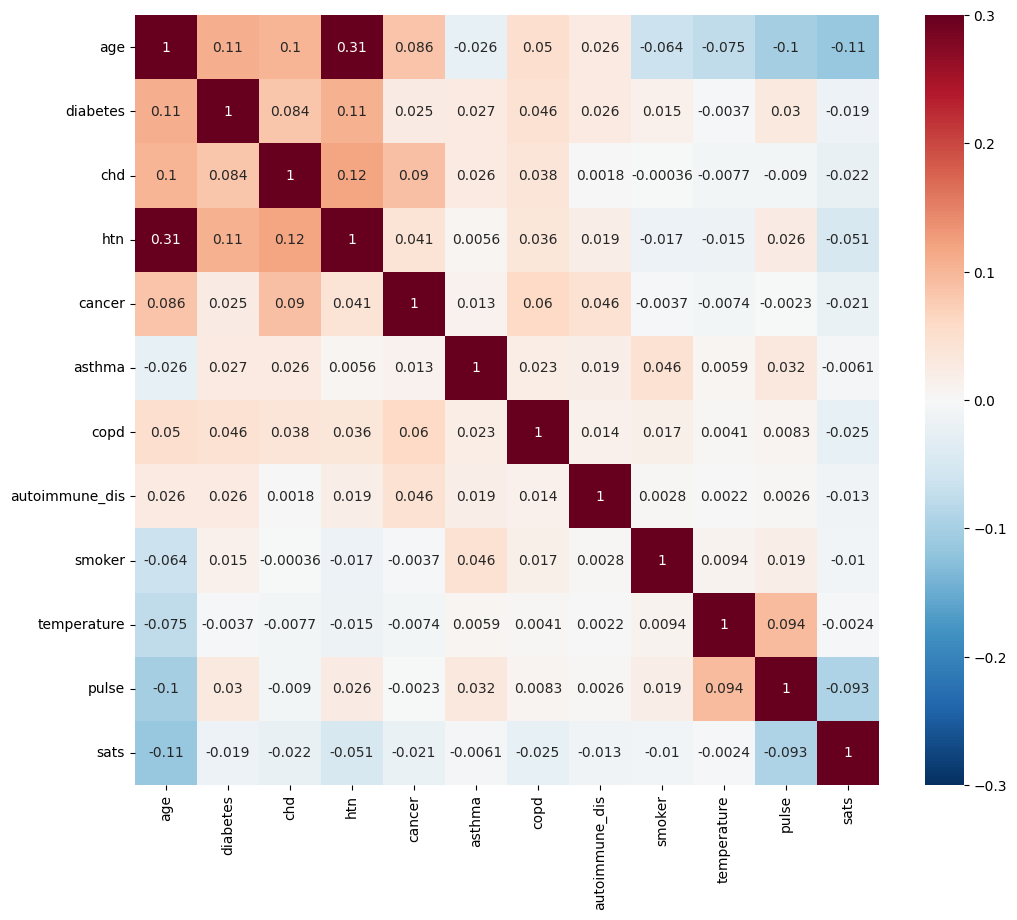

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12, 10))
_ = sns.heatmap(correlation_matrix, annot=True,vmin=-.3, vmax=.3, center=0, cmap="RdBu_r", ax=ax)